<a href="https://colab.research.google.com/github/esay2077/video_intelligence/blob/master/%EC%96%BC%EA%B5%B4%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir known
!wget https://upload.wikimedia.org/wikipedia/commons/e/ed/Elon_Musk_Royal_Society.jpg -O known/elon.jpg
!wget https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg -O known/bill.jpg
!wget https://pmcvariety.files.wordpress.com/2017/05/mark-zuckerberg.jpg?w=681&h=383&crop=1 -O known/mark.jpg

--2020-12-07 16:19:07--  https://upload.wikimedia.org/wikipedia/commons/e/ed/Elon_Musk_Royal_Society.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239507 (234K) [image/jpeg]
Saving to: ‘known/elon.jpg’

known/elon.jpg      100%[===================>] 233.89K  --.-KB/s    in 0.02s   

2020-12-07 16:19:07 (13.2 MB/s) - ‘known/elon.jpg’ saved [239507/239507]

--2020-12-07 16:19:07--  https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 192.229.233.50, 2606:2800:134:fa2:1627:1fe:edb:1665
Connecting to pbs.twimg.com (pbs.twimg.com)|192.229.233.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23065 (23K) [image/jpeg]
Saving to: ‘known/bill.jpg’

known/bill.jpg      100%[===================>]  22.52K  --.

In [2]:
!mkdir unknown
!wget https://cdn.vox-cdn.com/thumbor/4QtOwnOxCdwESvt1-CpQSTZvHHA=/1400x1400/filters:format(jpeg)/cdn.vox-cdn.com/uploads/chorus_asset/file/19932738/1206292068.jpg -O unknown/1.jpg
!wget  https://upload.wikimedia.org/wikipedia/commons/a/a0/Bill_Gates_2018.jpg -O unknown/2.jpg
!wget https://api.time.com/wp-content/uploads/2019/04/mark-zuckerberg-time-100-2019.jpg?quality=85&zoom=2 -O unknown/3.jpg


/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `wget https://cdn.vox-cdn.com/thumbor/4QtOwnOxCdwESvt1-CpQSTZvHHA=/1400x1400/filters:format(jpeg)/cdn.vox-cdn.com/uploads/chorus_asset/file/19932738/1206292068.jpg -O unknown/1.jpg'
--2020-12-07 16:19:10--  https://upload.wikimedia.org/wikipedia/commons/a/a0/Bill_Gates_2018.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 318220 (311K) [image/jpeg]
Saving to: ‘unknown/2.jpg’

unknown/2.jpg       100%[===================>] 310.76K  --.-KB/s    in 0.02s   

2020-12-07 16:19:10 (16.5 MB/s) - ‘unknown/2.jpg’ saved [318220/318220]

/bin/bash: -O: command not found
--2020-12-07 16:19:10--  https://api.time.com/wp-content/uploads/2019/04/mark-zuckerberg-time-100-2019.jpg?quality=85
Resolving api.time.com (api.time.co

In [3]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=2e74d4dedcf1553e5544ce4ed014000af9615751217bc6fe86cff37c50cb0324
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


['bill', 'elon']
['2.jpg']
Processing 2.jpg
[0.33844834 0.81563798]


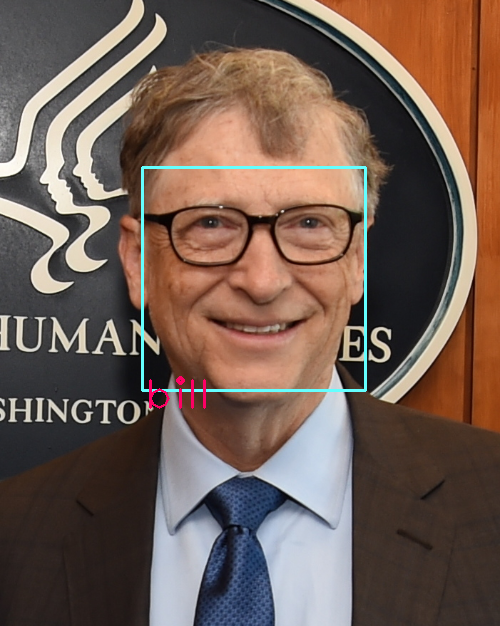

In [7]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
  img = cv2.imread(path)
  (h,w) = img.shape[:2]
  width = 500
  ratio = width / float(w)
  height = int(h * ratio)
  return cv2.resize(img,(width,height))
known_encodings = []
known_names = []
known_dir = 'known'
unknown_dir = 'unknown'

for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])
print(known_names)
print(os.listdir(unknown_dir))


for file in os.listdir(unknown_dir):
  print("Processing",file)
  img = read_img(unknown_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  results = face_recognition.compare_faces(known_encodings,img_enc)
  print(face_recognition.face_distance(known_encodings,img_enc))
  res = [i for i, val in enumerate(results) if val] 
  name = known_names[res[0]]
  (top,right,bottom,left) = face_recognition.face_locations(img)[0]
  cv2.rectangle(img,(left,top),(right,bottom),(255,255,100),2)
  cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN,3,(100,0,255),2)
  cv2_imshow(img)